Data loaded successfully.
Data filtered for season >= 2003.
Number of features 62
oof season 2003 mae: 8.968004233090566
oof season 2004 mae: 7.932508687336101
oof season 2005 mae: 7.564109590418068
oof season 2006 mae: 8.9012294155649
oof season 2007 mae: 7.841895386082211
oof season 2008 mae: 9.989559252564504
oof season 2009 mae: 9.173277919823562
oof season 2010 mae: 8.874525395282793
oof season 2011 mae: 9.686107021648692
oof season 2012 mae: 8.60062262441119
oof season 2013 mae: 10.292826575186645
oof season 2014 mae: 10.24458923985083
oof season 2015 mae: 7.498212397704498
oof season 2016 mae: 10.601813270494215
oof season 2017 mae: 9.938217537331148
oof season 2018 mae: 10.569328335296905
oof season 2019 mae: 8.99807179133989
oof season 2021 mae: 10.535660798206578
oof season 2022 mae: 10.743824157822308
oof season 2023 mae: 9.638746645664533
oof season 2024 mae: 9.536930495191976
average mae: 9.339526703348195
brier: 0.17134150952150362
brier: 0.17134150952150362
2003 0.18509


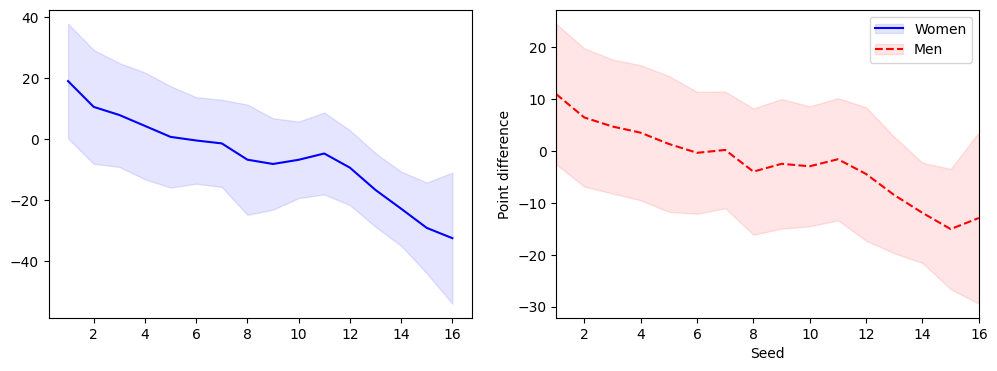

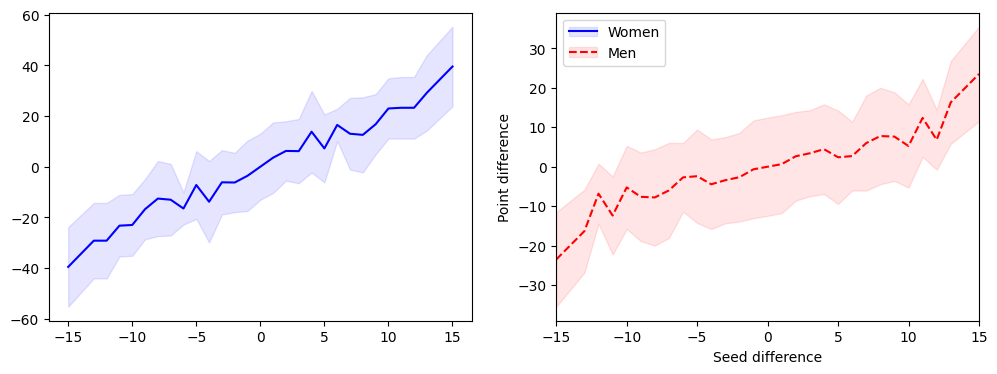

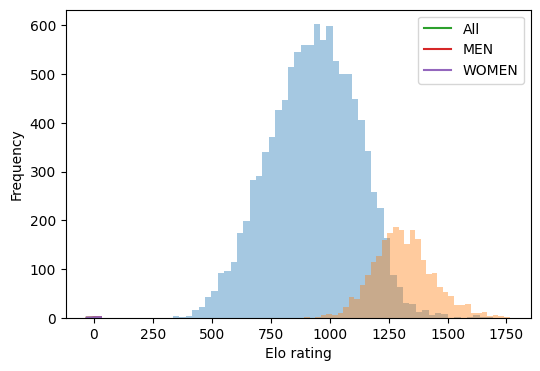

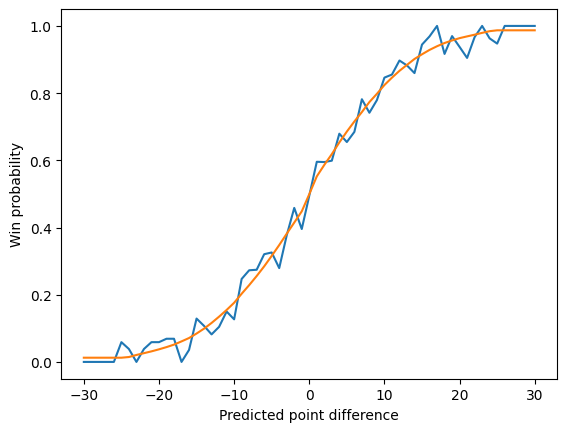

In [1]:
import pandas as pd
import import_ipynb
import numpy as np
from Predict import Prediction

data_dir = '../data/'
X = pd.read_csv(f"{data_dir}/SampleSubmissionStage2.csv")
X

predictions = Prediction()
X = predictions.get_predictions()

In [ ]:
#Manual Overrides; Increase model prediction confidence 

# Step 1: Increase pred by 10% if pred < 85%
X['Pred'] = X['Pred'].apply(lambda x: x + x * 0.1 if x < 0.85 else x)

# Step 2: Apply manual overrides for specific matches
# Matches with low pred compared to expectations for Early rounds
manual_overrides = {
#     '2025_1124_1280': 0.98185013,
#     '2025_1140_1433': 0.980304479,
#     '2025_1388_1435': 0.954379186,
#     '2025_1279_1314': 0.964069204,
#     '2025_1401_1463': 0.953761116,
#     '2025_1417_1429': 0.973425592
}

X['Pred'] = X.apply(lambda row: manual_overrides[row['ID']] if row['ID'] in manual_overrides else row['Pred'], axis=1)

X['Pred'] = X['Pred'].round(6)
X[['ID','Pred']].to_csv('..\predictions.csv',index=None)